## Heart_attack_Model_Building

In [1]:
#Attribute Information:
# age - Age of patients
# sex - Sex of patients which has 1 denotes male and 0 denotes female.
# cp -  Chest Pain type (4 values) has values between 0-3.
# trestbps - resting blood pressure is normal pressure with no exercise.
# chol - serum cholestoral in mg/dl
# fbs - fasting blood sugar > 120 mg/dl
# restecg- resting electrocardiographic results (values 0,1,2)
# thalach - maximum heart rate achieved
# exang - exercise induced angina
# oldpeak - ST depression induced by exercise relative to rest
# slope - the slope of the peak exercise ST segment
# ca - number of major vessels (0-3) colored by flourosopy
# thal -  3 = normal; 6 = fixed defect; 7 = reversable defect
# target - Heart attack prediction where 1 denotes Heart attack occured and 0 where it din't take occur.

In [2]:
#Loading The Libraries

#For loading and accessing the dataset

import pandas as pd
import numpy as np

#For visualizations

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [3]:
data = pd.read_csv("heart.csv")

In [4]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
data.shape

(303, 14)

In [6]:
data.rename(columns ={'age':'Age','sex':'Sex','cp':'Chest_pain','trestbps':'Resting_blood_pressure','chol':'Cholesterol','fbs':'Fasting_blood_sugar',
                    'restecg':'ECG_results','thalach':'Maximum_heart_rate','exang':'Exercise_induced_angina','oldpeak':'ST_depression','ca':'Major_vessels',
                   'thal':'Thalassemia_types','target':'Heart_attack','slope':'ST_slope'}, inplace = True)

Renaming the column headers for better understanding of visualizations.

In [7]:
data.head()

,Age,Sex,Chest_pain,Resting_blood_pressure,Cholesterol,Fasting_blood_sugar,ECG_results,Maximum_heart_rate,Exercise_induced_angina,ST_depression,ST_slope,Major_vessels,Thalassemia_types,Heart_attack
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Feature Engineering

We will be performing all the below steps in Feature Engineering

1. Missing values
2. Create dummy variables for categorical variables
3. Standarise the values of the variables to the same range

### 1) Checking for missing value

In [8]:
data.isnull().sum()

Age                        0
Sex                        0
Chest_pain                 0
Resting_blood_pressure     0
Cholesterol                0
Fasting_blood_sugar        0
ECG_results                0
Maximum_heart_rate         0
Exercise_induced_angina    0
ST_depression              0
ST_slope                   0
Major_vessels              0
Thalassemia_types          0
Heart_attack               0
dtype: int64

#####  Here  missing values are not present  in the dataset.

### 2) Create dummy variables for categorical variables

In [9]:
d1 = pd.get_dummies(data.Chest_pain)
d2 = pd.get_dummies(data.Thalassemia_types)
d3 = pd.get_dummies(data.ECG_results)
d4 = pd.get_dummies(data.ST_slope)
d5 = pd.get_dummies(data.Major_vessels)
data_1 = pd.concat([data,d1,d2,d3,d4,d5],axis = 'columns')

#### Here I have created dummy variables for categorical data to increase the accuracy.

In [10]:
# Dropping the old variables 
data_new = data_1.drop(['Chest_pain','Thalassemia_types','ECG_results','ST_slope','Major_vessels'],axis = 1)
data_new.head()

,Age,Sex,Resting_blood_pressure,Cholesterol,Fasting_blood_sugar,Maximum_heart_rate,Exercise_induced_angina,ST_depression,Heart_attack,0,...,1,2,0,1,2,0,1,2,3,4
0,63,1,145,233,1,150,0,2.3,1,0,...,0,0,1,0,0,1,0,0,0,0
1,37,1,130,250,0,187,0,3.5,1,0,...,1,0,1,0,0,1,0,0,0,0
2,41,0,130,204,0,172,0,1.4,1,0,...,0,0,0,0,1,1,0,0,0,0
3,56,1,120,236,0,178,0,0.8,1,0,...,1,0,0,0,1,1,0,0,0,0
4,57,0,120,354,0,163,1,0.6,1,1,...,1,0,0,0,1,1,0,0,0,0


#### Splitting the data set in train and test

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x = data_new.drop(['Heart_attack'], axis = 1)
y = data_new['Heart_attack']

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.20, random_state = 5)

### 3) Standarise the values of the variables to the same range

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
feature_scaler = MinMaxScaler()
x_train = feature_scaler.fit_transform(x_train)
x_test = feature_scaler.transform(x_test)

##### Scaling the dataet for  getting better accuracy.

In [16]:
# Create List which will store the accuracy value for all models used.
accuracy_list = []

# Building Model Using Different Classifier

### 1) Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
# Find best parameters  using GridSearchCV

log_r = LogisticRegression()

C = [0.01,0.1, 1, 5, 10]
parameters = {'C': [0.1 , 1 , 2, 5, 10, 15, 20]}

from sklearn.model_selection import GridSearchCV
log_reg = GridSearchCV(log_r, parameters, scoring='neg_mean_squared_error' ,cv =5)
log_reg.fit(x_train, y_train)
log_reg.best_params_

{'C': 0.1}

#### Best parameter value for the c is 0.1

In [19]:
# Fit the model

log_model = LogisticRegression(C=0.1)

log_model.fit(x_train,y_train)

LogisticRegression(C=0.1)

In [20]:
# Testing the model  and check for accuracy 

from sklearn.metrics import accuracy_score,confusion_matrix
log_model_accuracy = log_model.score(x_test,y_test)
accuracy_list.append(log_model_accuracy)
print('Logistic Regression Accuracy -->',((log_model_accuracy)*100))

Logistic Regression Accuracy --> 88.52459016393442


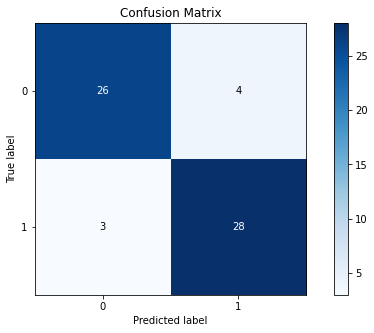

In [21]:
# Predict the model & plot confusion matrix

import scikitplot as skplt
log_model_pred = log_model.predict(x_test)
log_model_matrix = (y_test,log_model_pred)
skplt.metrics.plot_confusion_matrix(y_test, log_model_pred,figsize=(10,5))

#### Logistic Regression  Classifier predict  only 7 samples false, otherwise all the samples were predicted true.

## 2) Decision Trees

In [22]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
# Find best parameters  using GridSearchCV

dt = DecisionTreeClassifier()

criterion = ['gini','entropy']
splitter = ['best','random']
parameters = {'criterion': ['gini','entropy']}

from sklearn.model_selection import GridSearchCV
dt_cl = GridSearchCV(dt, parameters, scoring='neg_mean_squared_error' ,cv =5)
dt_cl.fit(x_train, y_train)
dt_cl.best_params_

{'criterion': 'gini'}

#### Best parameter is 'criterion': 'gini'

In [24]:
# Fit the model

dt_model = DecisionTreeClassifier(criterion = 'gini')

dt_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [25]:
# Testing the model and check for accuracy 

from sklearn.metrics import accuracy_score,confusion_matrix
dt_model_accuracy = dt_model.score(x_test,y_test)
accuracy_list.append(dt_model_accuracy)
print('Decision Tree Accuracy -->',((dt_model_accuracy)*100))

Decision Tree Accuracy --> 83.60655737704919


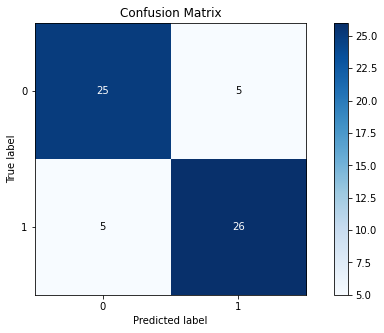

In [26]:
# Predict the model & plot confusion matrix
import scikitplot as skplt
dt_model_pred = dt_model.predict(x_test)
dt_model_matrix = (y_test,dt_model_pred)
skplt.metrics.plot_confusion_matrix(y_test ,dt_model_pred ,figsize=(10,5))

#### Decision Tree Classifier predict  only 10 samples false, otherwise all the samples were predicted true.

## 3) Support Vector Machine

In [27]:
from sklearn.svm import LinearSVC

In [28]:
# Find best parameters  using GridSearchCV

svm= LinearSVC()

penalty = ['l1','l2']
C = [0.01,0.1,1,5,10,15,20]
loss = ['hinge','squared_hinge']
parameters = {'penalty':['l1','l2'],'C': [.01,.1,1,5,10,15,20],'loss':['hinge','squared_hinge']}

from sklearn.model_selection import GridSearchCV
svm_cl = GridSearchCV(svm, parameters, scoring='neg_mean_squared_error' ,cv =5)
svm_cl.fit(x_train, y_train)
svm_cl.best_params_

C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_classes.py", line 233, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 965, in _fit_liblinear
    solver_type = _get_liblinear_solver_type(multi_class, penalty, loss, dual)
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 821, in _get_liblinear_solver_type
    raise ValueError('Unsupported set of arguments: %s, '
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss

C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_classes.py", line 233, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
  File "C:\

{'C': 0.01, 'loss': 'squared_hinge', 'penalty': 'l2'}

#### Best parameter are 'C': 0.01, 'loss': 'squared_hinge', 'penalty': 'l2'

In [29]:
# Fit the model

svm_model = LinearSVC(C = 0.01,loss = 'squared_hinge',penalty = 'l2')

svm_model.fit(x_train,y_train)

LinearSVC(C=0.01)

In [30]:
# Testing the model  and check for accuracy 

from sklearn.metrics import accuracy_score,confusion_matrix
svm_model_accuracy = svm_model.score(x_test,y_test)
accuracy_list.append(svm_model_accuracy)
print('SVM Classifier Accuracy -->',((svm_model_accuracy)*100))

SVM Classifier Accuracy --> 88.52459016393442


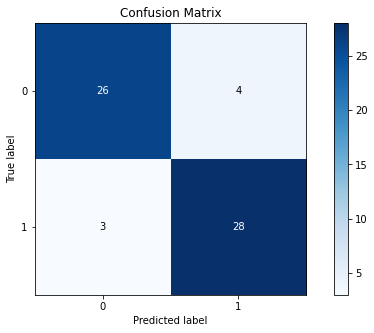

In [31]:
# Predict the model & plot confusion matrix

import scikitplot as skplt
svm_model_pred = svm_model.predict(x_test)
svm_model_matrix = (y_test,svm_model_pred)
skplt.metrics.plot_confusion_matrix(y_test ,svm_model_pred ,figsize=(10,5))

#### SVM Classifier predict  only 7 samples false, otherwise all the samples were predicted true.

## 4) Gaussian Naive Bayes

In [32]:
from sklearn.naive_bayes import GaussianNB

In [33]:
# Fit the model

gnb_model = GaussianNB()

gnb_model.fit(x_train, y_train)

GaussianNB()

In [34]:
# Testing the model  and check for accuracy 

from sklearn.metrics import accuracy_score,confusion_matrix
gnb_model_accuracy = gnb_model.score(x_test,y_test)
accuracy_list.append(gnb_model_accuracy)
print('Gaussian NB Accuracy -->',((gnb_model_accuracy)*100))

Gaussian NB Accuracy --> 85.24590163934425


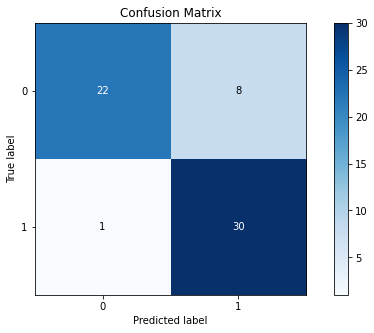

In [35]:
# Predict the model & plot confusion matrix

import scikitplot as skplt
gnb_model_pred = gnb_model.predict(x_test)
gnb_model_matrix = (y_test,gnb_model_pred)
skplt.metrics.plot_confusion_matrix(y_test ,gnb_model_pred ,figsize=(10,5))

#### Gaussian Naive Bayes Classifier predict  only 9 samples false, otherwise all the samples were predicted true.

## 5) Multinomial Naive Bayes

In [36]:
from sklearn.naive_bayes import MultinomialNB

In [37]:
# Fit the model

mnb_model = MultinomialNB()

mnb_model.fit(x_train, y_train)

MultinomialNB()

In [38]:
# Testing the model  and check for accuracy 

from sklearn.metrics import accuracy_score,confusion_matrix
mnb_model_accuracy = mnb_model.score(x_test,y_test)
accuracy_list.append(mnb_model_accuracy)
print('Multinomial NB Accuracy -->',((mnb_model_accuracy)*100))

Multinomial NB Accuracy --> 88.52459016393442


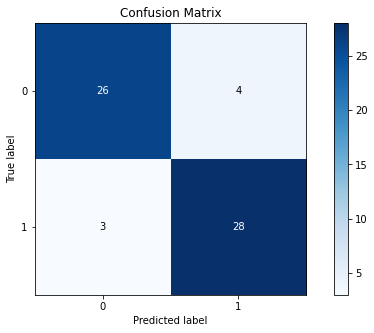

In [39]:
# Predict the model & plot confusion matrix

import scikitplot as skplt
mnb_model_pred = mnb_model.predict(x_test)
mnb_modelmatrix = (y_test,mnb_model_pred)
skplt.metrics.plot_confusion_matrix(y_test ,mnb_model_pred ,figsize=(10,5))

#### Multinomial Naive Bayes Classifier predict  only 7 samples false, otherwise all the samples were predicted true.

## 6) Random Forest Classifier

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
# Find best parameters  using GridSearchCV

rf = RandomForestClassifier()

n_estimators = [250,500,750,1000]
criterion = ['gini','entropy']
max_features = ['auto','sqrt','log2']
random_state = [5]
parameters = {'n_estimators': [250,500,750,1000],'criterion': ['gini','entropy'],'max_features':['auto','sqrt','log2']}

from sklearn.model_selection import GridSearchCV
rf_cl = GridSearchCV(rf, parameters, scoring='neg_mean_squared_error' ,cv =5)
rf_cl.fit(x_train, y_train)
rf_cl.best_params_

{'criterion': 'gini', 'max_features': 'log2', 'n_estimators': 1000}

#### Best parameter are 'criterion': 'gini', 'max_features': 'log2', 'n_estimators': 1000

In [42]:
# Fit the model

rf_model = RandomForestClassifier(criterion = 'gini',max_features = 'log2',n_estimators = 1000, random_state = 5)

rf_model.fit(x_train,y_train)

RandomForestClassifier(max_features='log2', n_estimators=1000, random_state=5)

In [43]:
# Testing the model  and check for accuracy 

from sklearn.metrics import accuracy_score,confusion_matrix
rf_model_accuracy = rf_model.score(x_test,y_test)
accuracy_list.append(rf_model_accuracy)
print('Random Forest Classifier Accuracy -->',((rf_model_accuracy)*100))

Random Forest Classifier Accuracy --> 93.44262295081968


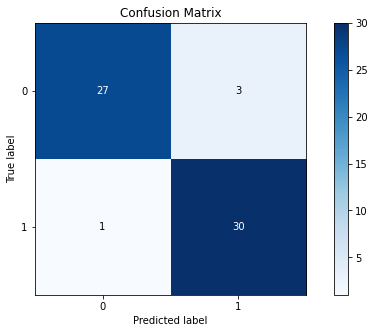

In [44]:
# Predict the model & plot confusion matrix

import scikitplot as skplt
rf_model_pred = rf_model.predict(x_test)
rf_model_matrix = (y_test,rf_model_pred)
skplt.metrics.plot_confusion_matrix(y_test ,rf_model_pred ,figsize=(10,5))

#### Random Forest Classifier predict  only 4 samples false, otherwise all the samples were predicted true.

## 7) Gradient Boosting Classifier


In [45]:
from sklearn.ensemble import GradientBoostingClassifier

In [46]:
# Find best parameters  using GridSearchCV

gb = GradientBoostingClassifier()

n_estimators = [250,500,750,1000]
loss = ['deviance','exponential']
max_features = ['auto','sqrt','log2']
parameters = {'n_estimators': [250,500,750,1000],'loss': ['deviance','exponential'],'max_features':['auto','sqrt','log2']}

from sklearn.model_selection import GridSearchCV
gb_cl = GridSearchCV(gb, parameters, scoring='neg_mean_squared_error' ,cv =5)
gb_cl.fit(x_train, y_train)
gb_cl.best_params_

{'loss': 'exponential', 'max_features': 'log2', 'n_estimators': 250}

#### Best parameter are 'loss': 'exponential', 'max_features': 'log2', 'n_estimators': 250

In [47]:
# Fit the model

gb_model = GradientBoostingClassifier(loss = 'exponential',max_features = 'log2',n_estimators = 250, random_state = 5)

gb_model.fit(x_train,y_train)

GradientBoostingClassifier(loss='exponential', max_features='log2',
                           n_estimators=250, random_state=5)

In [48]:
# Testing the model  and check for accuracy 

from sklearn.metrics import accuracy_score,confusion_matrix
gb_model_accuracy = gb_model.score(x_test,y_test)
accuracy_list.append(gb_model_accuracy)
print('Gradient Boosting Classifier Accuracy -->',((gb_model_accuracy)*100))

Gradient Boosting Classifier Accuracy --> 86.88524590163934


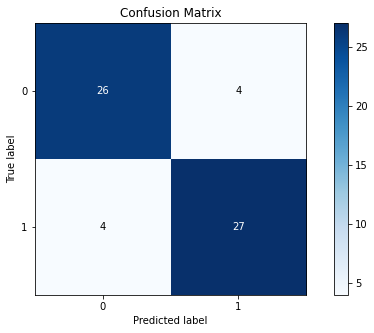

In [49]:
# Predict the model & plot confusion matrix

import scikitplot as skplt
gb_model_pred = gb_model.predict(x_test)
gb_model_matrix = (y_test,gb_model_pred)
skplt.metrics.plot_confusion_matrix(y_test ,gb_model_pred ,figsize=(10,5))

#### Gradient Boosting  Classifier predict  only 8 samples false, otherwise all the samples were predicted true.

## 8)  K-Nearest Neighbors

In [50]:
from sklearn.neighbors import KNeighborsClassifier

In [51]:
# Find best k (n_neighbors) value for better accuracy

k = range(1,20)
dict = {}
knn_acc_list = []
for i in k:
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train,y_train)
    y_pred = knn.predict(x_test)
    from sklearn import metrics
    dict[i] = metrics.accuracy_score(y_test,y_pred)
    knn_acc_list.append(metrics.accuracy_score(y_test,y_pred))

Text(0, 0.5, 'Accuracy')

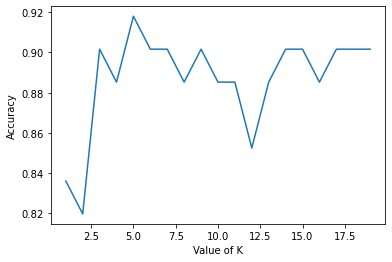

In [52]:
# Plot the accuracy and value of k

plt.plot(k,knn_acc_list)
plt.xlabel("Value of K")
plt.ylabel("Accuracy")

#### From above plot we can take the k value (n_neighbors) as 5 for higher accuracy

In [53]:
# Fit the model

knn_model = KNeighborsClassifier(n_neighbors = 5)

knn_model.fit(x_train,y_train)

KNeighborsClassifier()

In [54]:
# Testing the model  and check for accuracy 

from sklearn.metrics import accuracy_score,confusion_matrix
knn_model_accuracy = knn_model.score(x_test,y_test)
accuracy_list.append(knn_model_accuracy)
print('K_Neighbors Classifier Accuracy -->',((knn_model_accuracy)*100))

K_Neighbors Classifier Accuracy --> 91.80327868852459


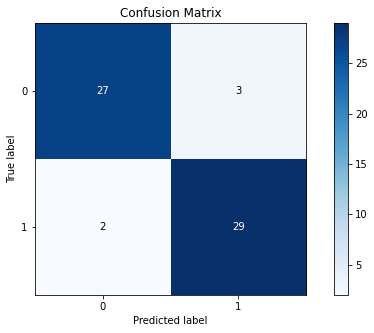

In [55]:
# Predict the model & plot confusion matrix 

import scikitplot as skplt
knn_model_pred = knn_model.predict(x_test)
knn_model_matrix = (y_test,knn_model_pred)
skplt.metrics.plot_confusion_matrix(y_test ,knn_model_pred ,figsize=(10,5))

#### K_Neighbors  Classifier predict  only 5 samples false, otherwise all the samples were predicted true.

## Accuracies obtained from all the models

In [56]:
# Make a dataframe of all accuracy

model_names_list = ['Logistic Regression','Decision Tree','SVM Classifier','Gaussian NB','Multinomial NB','Random Forest Classifier','Gradient Boost Classifier','K-Nearest Neighbors']
total_accuracy_list = list(zip(model_names_list,accuracy_list))

In [57]:
from pandas import DataFrame
accuracy_df = pd.DataFrame(total_accuracy_list, columns = ['Model_Name','Model_Accuracy'])

In [58]:
# Plot c- map of accuracy

accuracy_map = accuracy_df.groupby(['Model_Name'])['Model_Accuracy'].mean().reset_index().sort_values(by='Model_Accuracy',ascending=False)
accuracy_map.head(8).style.background_gradient(cmap='Reds')

,Model_Name,Model_Accuracy
6,Random Forest Classifier,0.934426
3,K-Nearest Neighbors,0.918033
4,Logistic Regression,0.885246
5,Multinomial NB,0.885246
7,SVM Classifier,0.885246
2,Gradient Boost Classifier,0.868852
1,Gaussian NB,0.852459
0,Decision Tree,0.836066


#### Above table shows Model name and respective accuracy which we were calculated

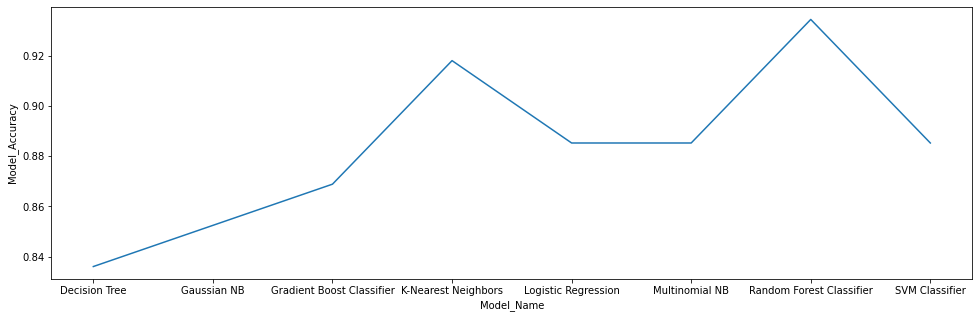

In [59]:
# line plot for the accuracy of all models 

plt.figure(figsize=(16.5,5)) 
sns.lineplot( data = accuracy_df, x = 'Model_Name',y = 'Model_Accuracy')

#### Above plot shows line plot of Model_Name nad respective Model_Accuracy

### Form above models and the accuracy we got 93.44% accuracy for the Random Forest Classifier which has top accuracy in above all models 